# Hierarchical Clustering

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
# Importing the dataset
df = pd.read_csv('invest_prep_logist.csv', sep=';')
df.head(20)

,country,is_urban,age,female,married,religion,can_calc_percents,employment_type_last_year,income_government_last_year,income_own_business_last_year,...,active_bank_user,cash_property_savings,has_insurance,can_call,can_make_transaction,phone_ownership,num_financial_activities_last_year,literacy,has_investment,formal_savings (Y)
0,0,0,57,1,1,1,1,0,1,0,...,0,0,0,1,1,2,0,1,0,0
1,1,0,40,0,1,2,0,0,0,0,...,0,0,0,0,0,2,0,1,0,1
2,2,0,35,1,1,0,0,1,0,0,...,0,1,0,1,0,2,2,0,0,0
3,2,1,19,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
4,3,0,61,1,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,3,1,16,1,0,0,0,1,1,0,...,0,0,0,1,1,1,0,1,0,0
6,0,0,40,0,1,0,0,2,0,0,...,0,1,0,0,0,0,0,0,1,0
7,1,0,27,1,1,2,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
8,3,1,35,0,1,0,1,0,0,0,...,1,1,0,1,1,2,2,1,1,1
9,4,0,72,1,0,1,0,2,0,0,...,0,0,0,0,0,2,4,0,0,1


В последнее время бедность осознается как глобальная проблема. В статистических исследованиях очень трудно определить и отразить данные по наиболее уязвимым и социально незащищенным группам населения. Для понимания того, кто подвержен бедности, где помощь нужна больше всего, необходимы данные с более высокой детализацией. Такими данными как раз являются «Poverty Probability Index & Economic Indicators». В нашем случае исследование проводиться для определения людей, которые тратят все средства к существованию (бедных и малоимущих). Результаты работы могут быть полезны для организаций, занимающихся социальной защитой населения (субсидиями, льготами, пенсиями и т.п.). Учитывая данную информацию, следует построить модель кластеризации, которая будет наилучшим способом определять именно бедных людей. Тривиальная модель с двумя классами (бедный - богатый) будет иметь изьян, поскольку такое грубое распределение на классы не включает среднестатистическое население со средним уровнем заработка. А, напомню, что орагнизация должна помочь именно бедствующим, поэтому целесообразно выделить 3 кластера, где люди со средним заработком будут некой границей между бедным и богатым населением.

In [3]:
df

,country,is_urban,age,female,married,religion,can_calc_percents,employment_type_last_year,income_government_last_year,income_own_business_last_year,...,active_bank_user,cash_property_savings,has_insurance,can_call,can_make_transaction,phone_ownership,num_financial_activities_last_year,literacy,has_investment,formal_savings (Y)
0,0,0,57,1,1,1,1,0,1,0,...,0,0,0,1,1,2,0,1,0,0
1,1,0,40,0,1,2,0,0,0,0,...,0,0,0,0,0,2,0,1,0,1
2,2,0,35,1,1,0,0,1,0,0,...,0,1,0,1,0,2,2,0,0,0
3,2,1,19,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
4,3,0,61,1,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8395,5,1,63,0,1,1,0,2,0,1,...,1,0,0,1,1,2,5,1,1,1
8396,4,0,59,0,0,1,0,2,0,0,...,0,1,0,0,0,0,0,0,0,0
8397,3,0,21,1,1,0,0,1,0,0,...,0,0,0,1,0,2,1,0,0,0
8398,0,1,32,0,1,1,0,0,1,0,...,1,0,1,1,1,2,3,1,1,1


In [4]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
df = pd.DataFrame(df, columns = ['country','is_urban','age','female','married','religion','can_calc_percents','employment_type_last_year','income_government_last_year','income_own_business_last_year','num_times_borrowed_last_year','active_bank_user','cash_property_savings','has_insurance','can_call','can_make_transaction','phone_ownership','num_financial_activities_last_year','literacy','has_investment','formal_savings (Y)']).round()

In [5]:
df

,country,is_urban,age,female,married,religion,can_calc_percents,employment_type_last_year,income_government_last_year,income_own_business_last_year,...,active_bank_user,cash_property_savings,has_insurance,can_call,can_make_transaction,phone_ownership,num_financial_activities_last_year,literacy,has_investment,formal_savings (Y)
0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8395,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
8396,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8397,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
8398,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0


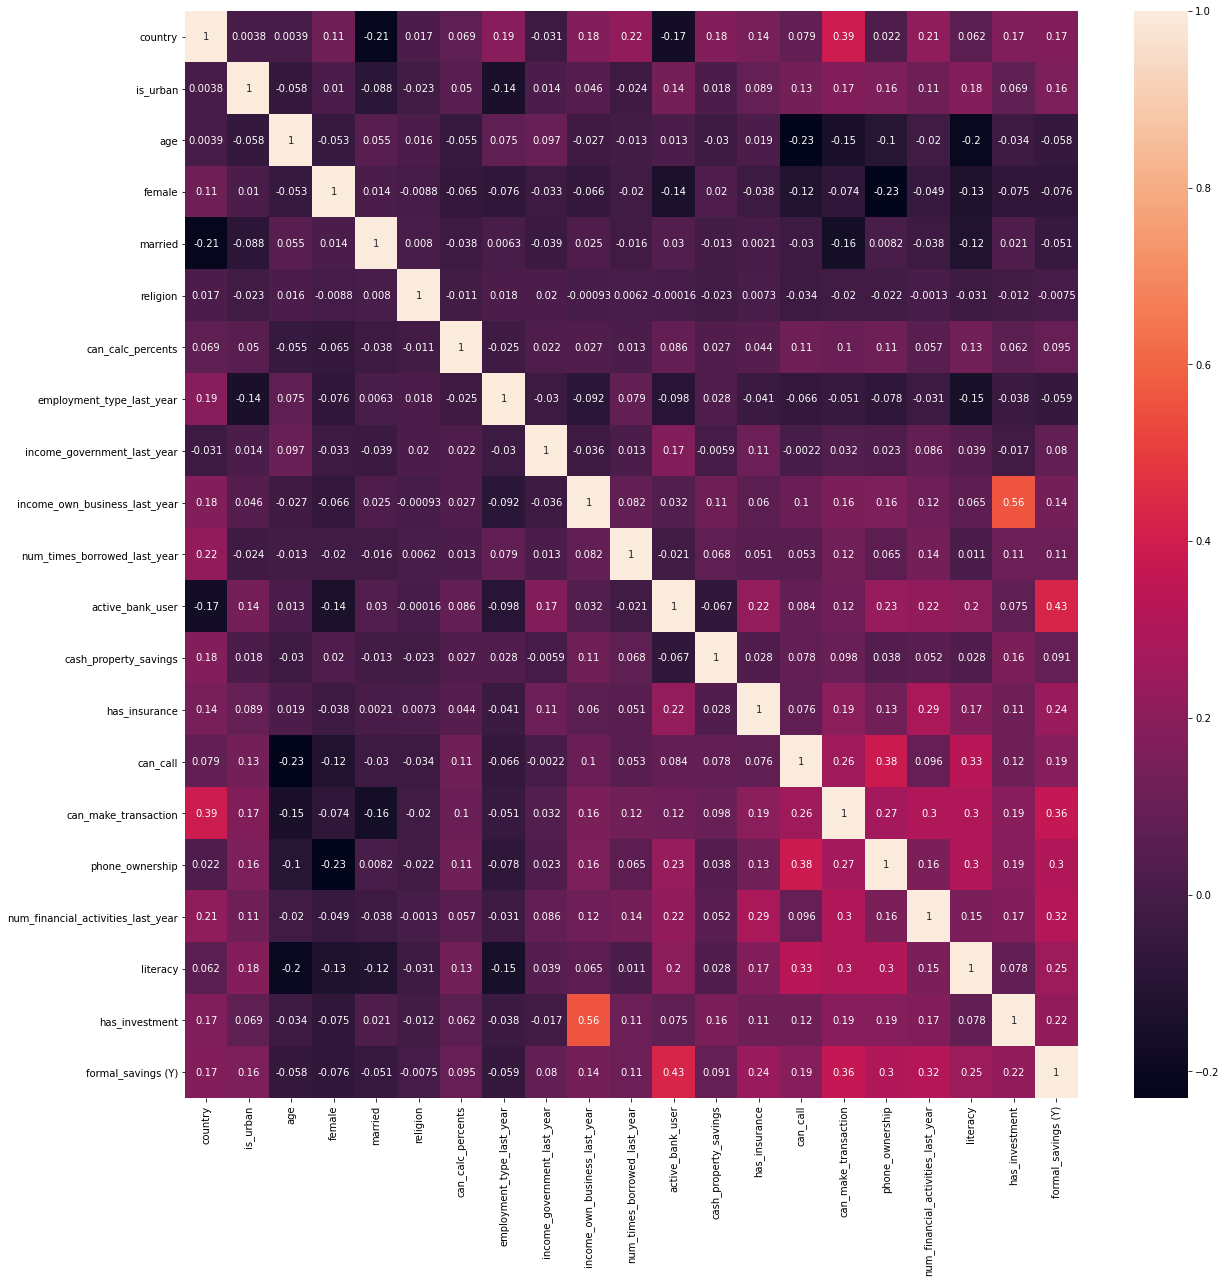

In [6]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, annot=True)
plt.show()

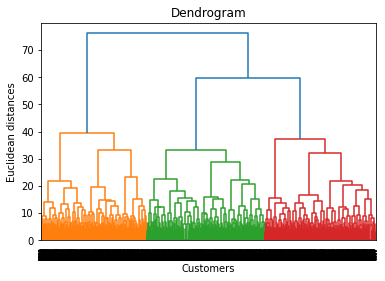

In [7]:
 #Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

По дендрограмме целесобразно выделить 2 или 3 вектора (длина ветки примерно одинаковая).

In [8]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [9]:
hc

array([2, 1, 2, ..., 2, 0, 1], dtype=int64)

In [10]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc1 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [11]:
hc1

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [12]:
X_var = df.iloc[:, [0,1,2,3,4,6,9,11,12,14,15,16,18,19,20 ]]

In [13]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc2 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward').fit_predict(X_var)

In [14]:
# Less features
X = df.iloc[:, [0, 9, 15, 16, 18, 19, 20]]

Стоить напомнить, что при построении модели логистической регрессии были выявлены наиболее значимые переменные. Исходя из тех данных и построенной корреляционной матрицы отобраны значимые предикторы. Среди их числа:
    
    1. Country - хотя в опросе принимали участия люди с разных слоев населения по каждой стране, возможно, получится, что все равно население в определенных регионах более склонно к бедности.
    
    2. num_times_borrowed_last_year - чем больше человек берет в долг, тем больше вероятность, что его финансовая достаточность на низком уровне и ему нужны эти средства для существования.
    
    3. can_make_transaction - интересный параметр, по которому так же можно отличить бедное население. Было выявлено, что люди с малым достатком редко пользуются банковскими услугами и в целом финансовая грамотность на низком уровне.
    
    4. phone_ownership - тенденция к нескольким телефонам явна присуща людям с высоким уровнем заработка.
    
    5. literacy - от уровня грамотности напрямую зависит умения человека, возможное рабочеее место и соответственно больше шанс на благосостояние.
    
    6.
    7. has_investment, formal_savings - у бедных людей вряд ли будут какие-то инвестиции и лишние накопления.

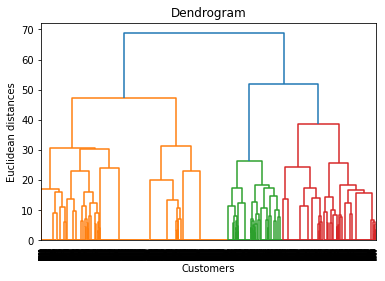

In [15]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [16]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc3 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward').fit_predict(X)

In [17]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc4 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward').fit_predict(X)

In [18]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc5 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward').fit_predict(X)

In [19]:
# Export hc clusters
import pickle
obj = {'hc': hc}
output = open('clust-hc.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

In [20]:
# Export hc clusters
import pickle
obj = {'hc1': hc1}
output = open('clust-hc1.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

In [21]:
# Export hc clusters
import pickle
obj = {'hc2': hc2}
output = open('clust-hc2.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

In [22]:
# Export hc clusters
import pickle
obj = {'hc3': hc3}
output = open('clust-hc3.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

In [23]:
# Export hc clusters
import pickle
obj = {'hc4': hc4}
output = open('clust-hc4.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

In [24]:
# Export hc clusters
import pickle
obj = {'hc5': hc5}
output = open('clust-hc5.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

Таким образом, было построено несколько моделей, среди которых нужно отобрать оптимальную.

1. Разделение на 3 кластера по всем переменным. Здесь можно столкнуться с проблемой, что не все ядра кластером будут вариативны, поэтому в последствии придется некоторые переменные убирать с модели.

2. Разделение на 2 кластера по всем переменным.

3. Разделение на 3 кластера по наиболее вариативным переменным.

4,5. Так же дополнительно было произведено разделение на 2 и 3 кластера соответсвенно на базе наиболее влиятельных переменных. 

Чтобы определиться какая из предложенных моделей лучше - проведем дополнительно кластеризацию методом k-means и сравним результаты между собой.